>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial/introduction.html)


`API Overview`

# Seaborn 플로팅 함수 개요
Overview of seaborn plotting functions

대부분의 seaborn 기능은 플로팅 함수를 통해 이루어집니다. 이번 챕터에서는 여러 high-level 함수들에 대해 알아볼 것입니다. 그리고 다음 챕터부터는 각 함수의 구체적인 면에 대해 알아볼 예정입니다.

## 비슷한 함수의 비슷한 기능
Similar functions for similar tasks

모든 기능은 top level에서 접근 가능하지만, 사실 코드는 비슷한 시각화를 만들어내는 여러 방법의 함수 모듈끼리 계층적(hierarchically)인 구조를 이룹니다. 앞으로 만날 대부분의 문서는 이렇게 모듈을 중심으로 구성되어 있을 것입니다 : "관계형(relational)", "분포형(distributional)", "범주형(categorical)"

예를 들어, 분포형 모듈은 데이터포인트(datapoint)의 분포를 나타내는데 특화된 함수를 정의합니다. 우리에게 친숙한 히스토그램(histogram)도 여기에 포함됩니다 :

In [9]:
import seaborn as sns  # 라이브러리 로드
sns.set_theme()  # 지난 챕터에서 설정한 기본테마(theme)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


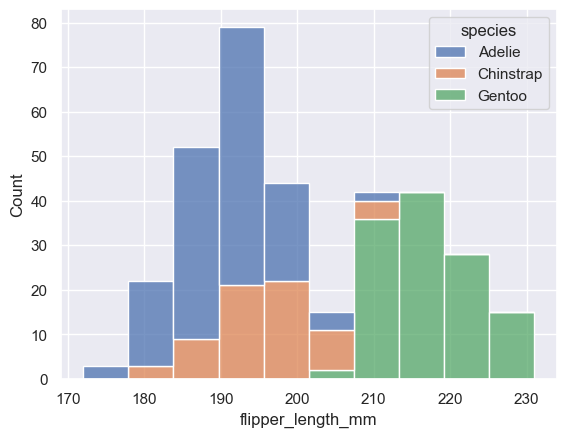

In [12]:
penguins = sns.load_dataset('penguins')
display(penguins.head(2))
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack');

비슷한 방법으로, (덜 친숙하지겠지만) 커널 밀도 추정(kernel density estimation) 옵션도 있습니다 :

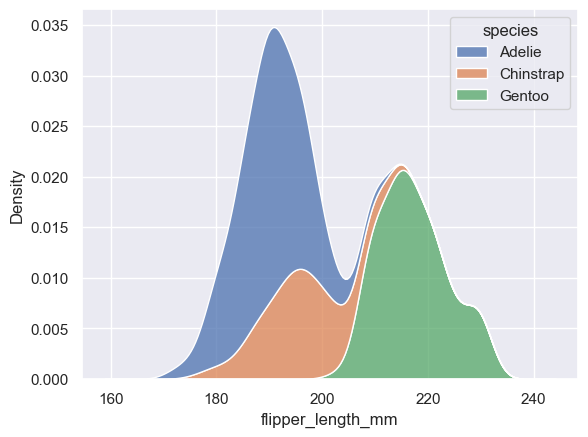

In [13]:
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack');

하나의 모듈에 들어있는 함수들은 코드를 상당부분 공유하고 있습니다. 그렇기 떄문에 라이브러리 내의 다른 컴포넌트에는 없는 요소들(ex. 위의 histplot과 kdeplot의 `multiple='stack`) 이 함수들은 비슷하게 가지고 있습니다. 같은 모듈 내의 함수들이라도 데이터셋을 표현하는데에 있어서 각각의 장단점이 있기 때문에 서로 변환이 쉽도록 되어 있습니다.

## Figure-level 함수  vs Axes-level 함수
Figure-level vs. axes-level functions

seaborn 함수(function)은 크게 축 수준(axes-level)과 그래프 수준(figure-level)로 나눌 수 있습니다. 위의 그래프는 axes-level 함수의 예시였습니다. axes-level 함수들은 하나의 `matplotlib.pyplot.Axes` 객체 위에 데이터를 함수의 리턴값(return value)로써 표현합니다.  

반면, figure-level 함수들은 seaborn 객체(주로 figure를 제어하는 FacetGrid)를 통해 matplotlib과 상호작용하게 됩니다. 각 모듈은 여러개의 axes-level 함수와 연결될 수 있는 하나의 figure-level 함수를 가지고 있습니다. 대략적인 분류는 아래와 같습니다 :   
  
<br>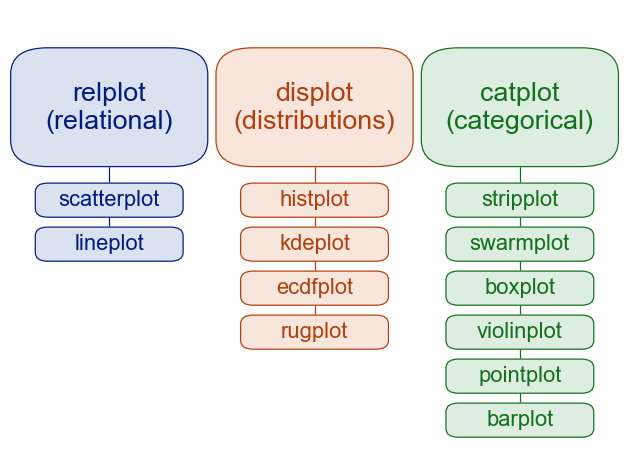

예를 들어, 분포함수 `disploat()` 은 distributions 모듈의 figure-level 함수입니다. 이 함수는 기본적(default behavior)으로 히스토그램(histogram)을 그리내는데, 이 때 뒷단에서 사용되는 코드는 `histplot()`과 동일합니다.

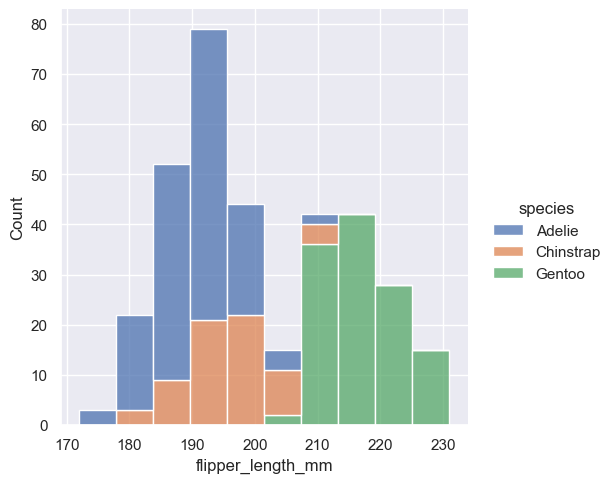

In [15]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack');

여기서 커널 밀도 플롯을 그리려면, `kind` 매개변수(parameter)를 사용하면 `kdeplot()`과 같은 코드를 사용하게 됩니다.


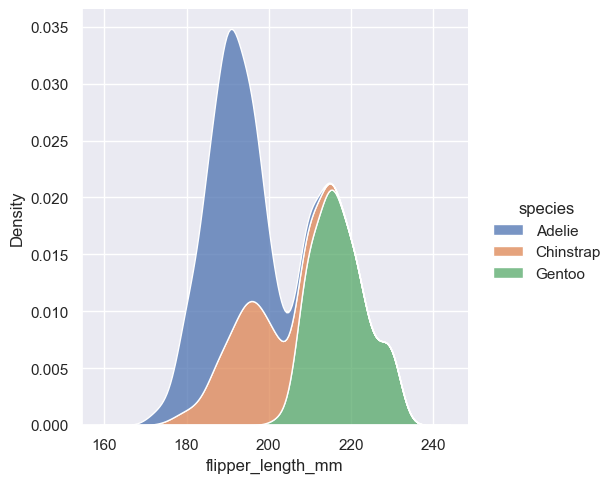

In [18]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde");

이렇게 보면 figure-level plot이 axes-level plot과 거의 같아 보이지만, 몇가지 차이가 있습니다. figure-level로 그린 plot에서는 범례(legend)가 plot 바깥에 있고, 모양이나 크기도 약간씩 다릅니다.

figure-level 함수가 가장 좋은 점은 여러개의 subplot을 쉽게 만들 수 있다는 것입니다. penguins 데이터셋을 예로, 하나의 축(axes)에 종별(species) 분포를 하나씩 생성해서 추가하는 대신, figure의 column마다 각각의 분포도를 그려서 "facet" 해줄 수 있습니다 :

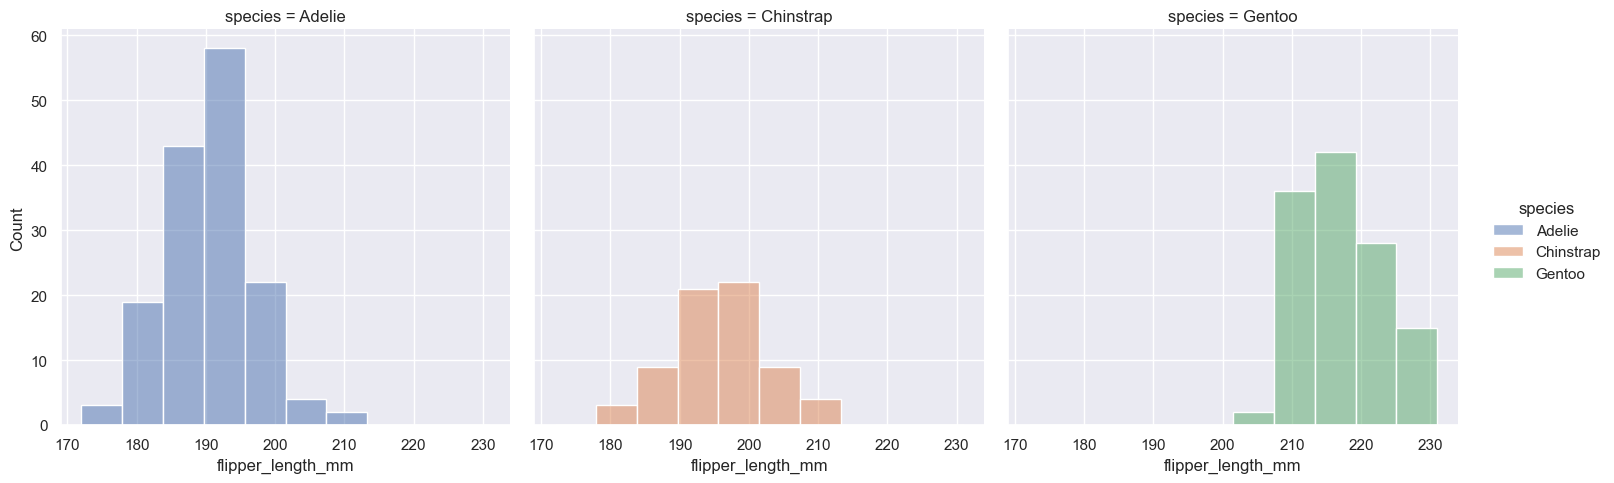

In [22]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species');

figure-level 함수는 그에 맞는 axes-level 함수를 감싸고(wrap) 있어서, kind를 정해주는 키워드 아규먼트(histogram의 bin, size 같은 keword arguments)를 내려보냅니다. 그만큼 유연하다는 의미이지만 단점도 있습니다. kind-specific 매개변수가 함수 signature나 docstring에는 보이지 않습니다. 그래서 일부 기능은 알아보기가 힘들고, 어떤 때는 방법을 이해하기 위해서 문서를 몇 개나 찾아봐야 할 수도 있습니다.

### 축(axes-level) 함수 
Axes-level functions make self-contained plots

axes-level 함수들은 matplotlib의 함수를 대신하여 편리하게 사용할 수 있습니다. axis-level 함수는 label이나 legend를 자동으로 추가해주지만, 그 axis-level 함수가 사용되어 그려진 axes 밖의 것은 수정하지 않습니다. 

That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.



The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

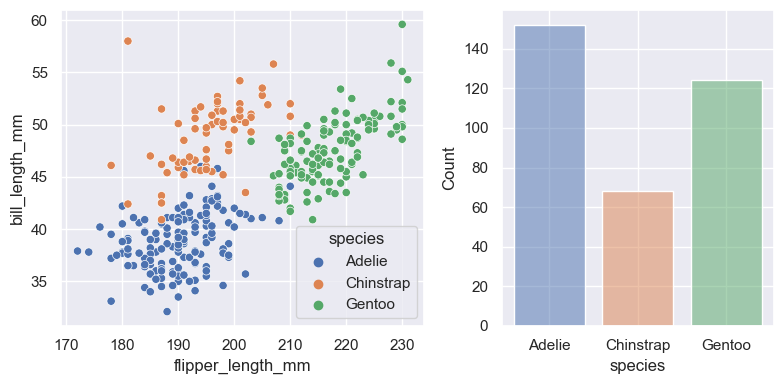

In [47]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', 
                hue='species', ax=axs[0])
sns.histplot(data=penguins, x='species', hue='species', shrink=.8, legend=False, ax=axs[1])
f.tight_layout()

### 자신만의 figure를 갖는 Figure-level 함수
Figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

### figure-level로 plot 커스터마이징
Customizing plots from a figure-level function

### figure 크기 설정
Specifying figure sizes

## 여러 표현방법 합치기
Combining multiple views on the data